### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Define Path

path = r'C:\Users\14239\Downloads\Personal'

In [4]:
# Import Data

df = pd.read_csv(os.path.join(path, 'Live_Ball_Era_Clean.csv'), index_col = False)

Data cleaned in previous exercises, no further cleaning needed.

### 2. Data prep for regression analysis 

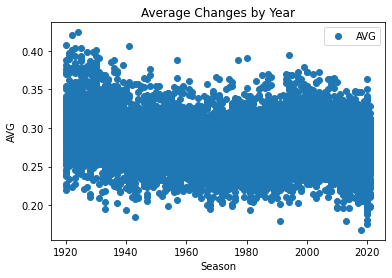

In [6]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Season', y='AVG',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Average Changes by Year')  
plt.xlabel('Season')  
plt.ylabel('AVG')  
plt.show()

Hypothesis: Batting averages have steadily been decreasing since 1920 - modern day.

In [7]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Season'].values.reshape(-1,1)
y = df['AVG'].values.reshape(-1,1)

In [8]:
X

array([[1923],
       [1921],
       [1920],
       ...,
       [1931],
       [1930],
       [1933]], dtype=int64)

In [9]:
y

array([[0.393],
       [0.378],
       [0.376],
       ...,
       [0.209],
       [0.286],
       [0.195]])

In [10]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [11]:
# Create a regression object.

regression = LinearRegression()

In [12]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [13]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

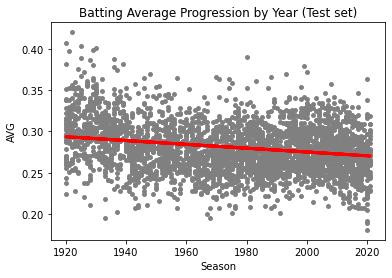

In [14]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Batting Average Progression by Year (Test set)')
plot_test.xlabel('Season')
plot_test.ylabel('AVG')
plot_test.show()

This visualization does reflect the idea that batting averages have been steadily decreasing since 1920. There is a clear negative correlation, though several data points that are well off the line. However, to the naked eye, you can see the decrease in the general data points as well.

In [15]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted)

In [16]:
# Print the model summary statistics. 

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.00023048]]
Mean squared error:  0.000845789968156774
R2 score:  0.061057497724500975


In [17]:
y_predicted

array([[0.29227399],
       [0.27337499],
       [0.27844546],
       ...,
       [0.27844546],
       [0.27959783],
       [0.27245309]])

In [18]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

Actual  Predicted
0    0.341   0.292274
1    0.276   0.273375
2    0.274   0.278445
3    0.306   0.271762
4    0.249   0.281442
5    0.283   0.283746
6    0.322   0.280520
7    0.256   0.285590
8    0.241   0.291813
9    0.306   0.289278
10   0.313   0.283516
11   0.309   0.278676
12   0.350   0.292504
13   0.271   0.276832
14   0.255   0.277754
15   0.289   0.290661
16   0.265   0.286282
17   0.283   0.284207
18   0.319   0.271992
19   0.256   0.274066
20   0.308   0.290891
21   0.271   0.286051
22   0.273   0.284438
23   0.254   0.284438
24   0.351   0.293657
25   0.249   0.278676
26   0.281   0.275449
27   0.270   0.288356
28   0.287   0.292735
29   0.282   0.278676

The model performed VERY poorly in this case. Even though there is evidence to support the notion that batting average is decreasing since 1920, the output data of averages is way too wide ranging and random to adequately model and predict individual player averages. However, this method may work at predicting an indivudal player every if we only include that players data. But the sample size would much too small for this exercise. I will likely explore other variables as an indicator of performace before the final project.